In [387]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import netCDF4 as nc
from salishsea_tools import viz_tools,places,nc_tools
import cmocean.cm as cm
import numpy as np
from salishsea_tools.geo_tools import find_closest_model_point as fcp
from importlib import reload


In [131]:
%matplotlib inline

In [132]:
grid = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy = grid.variables['Bathymetry'][:]
nav_lon = grid.variables['nav_lon'][:]
nav_lat = grid.variables['nav_lat'][:]

In [133]:
nc_tools.show_variables(grid)

odict_keys(['nav_lon', 'nav_lat', 'Bathymetry'])


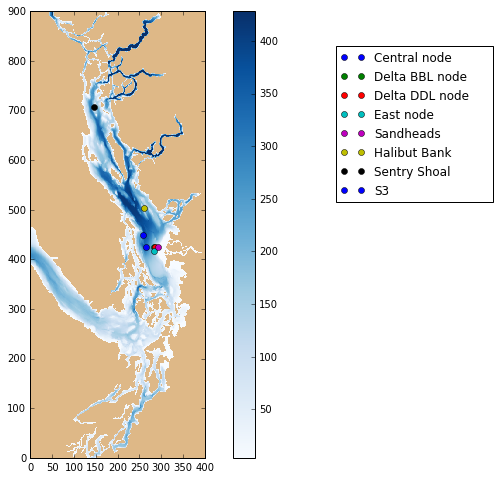

In [204]:
my_list = ['Central node', 'Delta BBL node', 'Delta DDL node', 'East node','Sandheads', \
               'Halibut Bank', 'Sentry Shoal', 'S3']
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('Blues')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
for nodes in my_list :
    points = places.PLACES[nodes]['NEMO grid ji']
    points = tuple(reversed(points))
    points = list(points)
    ax.plot(points[0], points[1], 'o', label = nodes)
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 0.82, 0.9, .102), ncol=1, mode="expand", borderaxespad=0.)




In [142]:
def nearest_search(nav_lon, nav_lat, stn_lon, stn_lat):
    '''
    ==========================================================
    Search the nearest grid point for a given station
        method: cKDTree (scipy.spatial.cKDTree)
        input: latitude and longitude as degrees
            ------- Yingkai Sha <yingkai@eos.ubc.ca>
    ----------------------------------------------------------
        stn_indx, stn_indy = nearest_search(nav_lon, nav_lat,
             stn_lon, stn_lat)
    ==========================================================
    '''
    from scipy.spatial import cKDTree # <-- The only function uses cKDTree
    # Create KDTree
    grids_list = list(zip(nav_lon.ravel(), nav_lat.ravel()))
    point_list = list(zip(stn_lon, stn_lat))
    domainTree = cKDTree(grids_list)
    # Nearest search
    _, index_flat = domainTree.query(point_list)
    stn_indx, stn_indy = np.unravel_index(index_flat, np.shape(nav_lon))
    return stn_indx, stn_indy

In [153]:
print(nav_lon.shape)

(898, 398)


In [160]:
%%timeit

index_x, index_y = nearest_search(nav_lon, nav_lat, np.array([-(123+33.5/60)]), np.array([49+7.5/60]))

print(index_x, index_y) 

[450] [258]
[450] [258]
[450] [258]
[450] [258]
[450] [258]
[450] [258]
[450] [258]
[450] [258]
1.2 s ± 49.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [273]:
%%timeit


index_geo_x, index_geo_y = fcp(-(123+33.5/60),49+7.5/60,nav_lon,nav_lat,)



print(index_geo_x, index_geo_y)

450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258
450 258


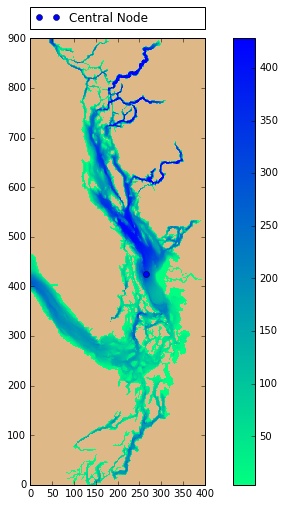

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
ax.plot(points[0], points[1], 'o', label = 'Central Node')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
#ax.annotate('Central Node', xy=(266, 424), xycoords='data',xytext=(10,10), 
        # textcoords='offset points', arrowprops=dict(arrowstyle="->"))

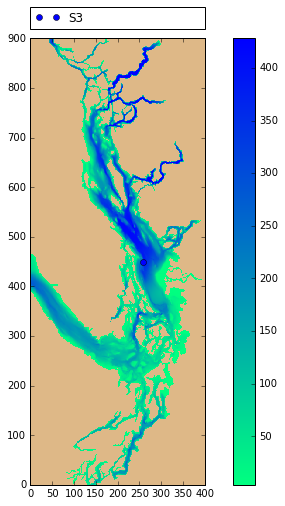

In [170]:


reload(places)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
ax.plot(258, 450, 'o', label = 'S3')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
#ax.annotate('Central Node', xy=(266, 424), xycoords='data',xytext=(10,10), 
        # textcoords='offset points', arrowprops=dict(arrowstyle="->"))

In [176]:
biology = nc.Dataset('/ocean/ssahu/MEOPAR/salishseasprint/biology_clusters.nc')

d_stn_x = biology.variables['stn_x'][:]
d_stn_y = biology.variables['stn_y'][:]
bio_non_norm = biology.variables['bio_non_norm'][:]

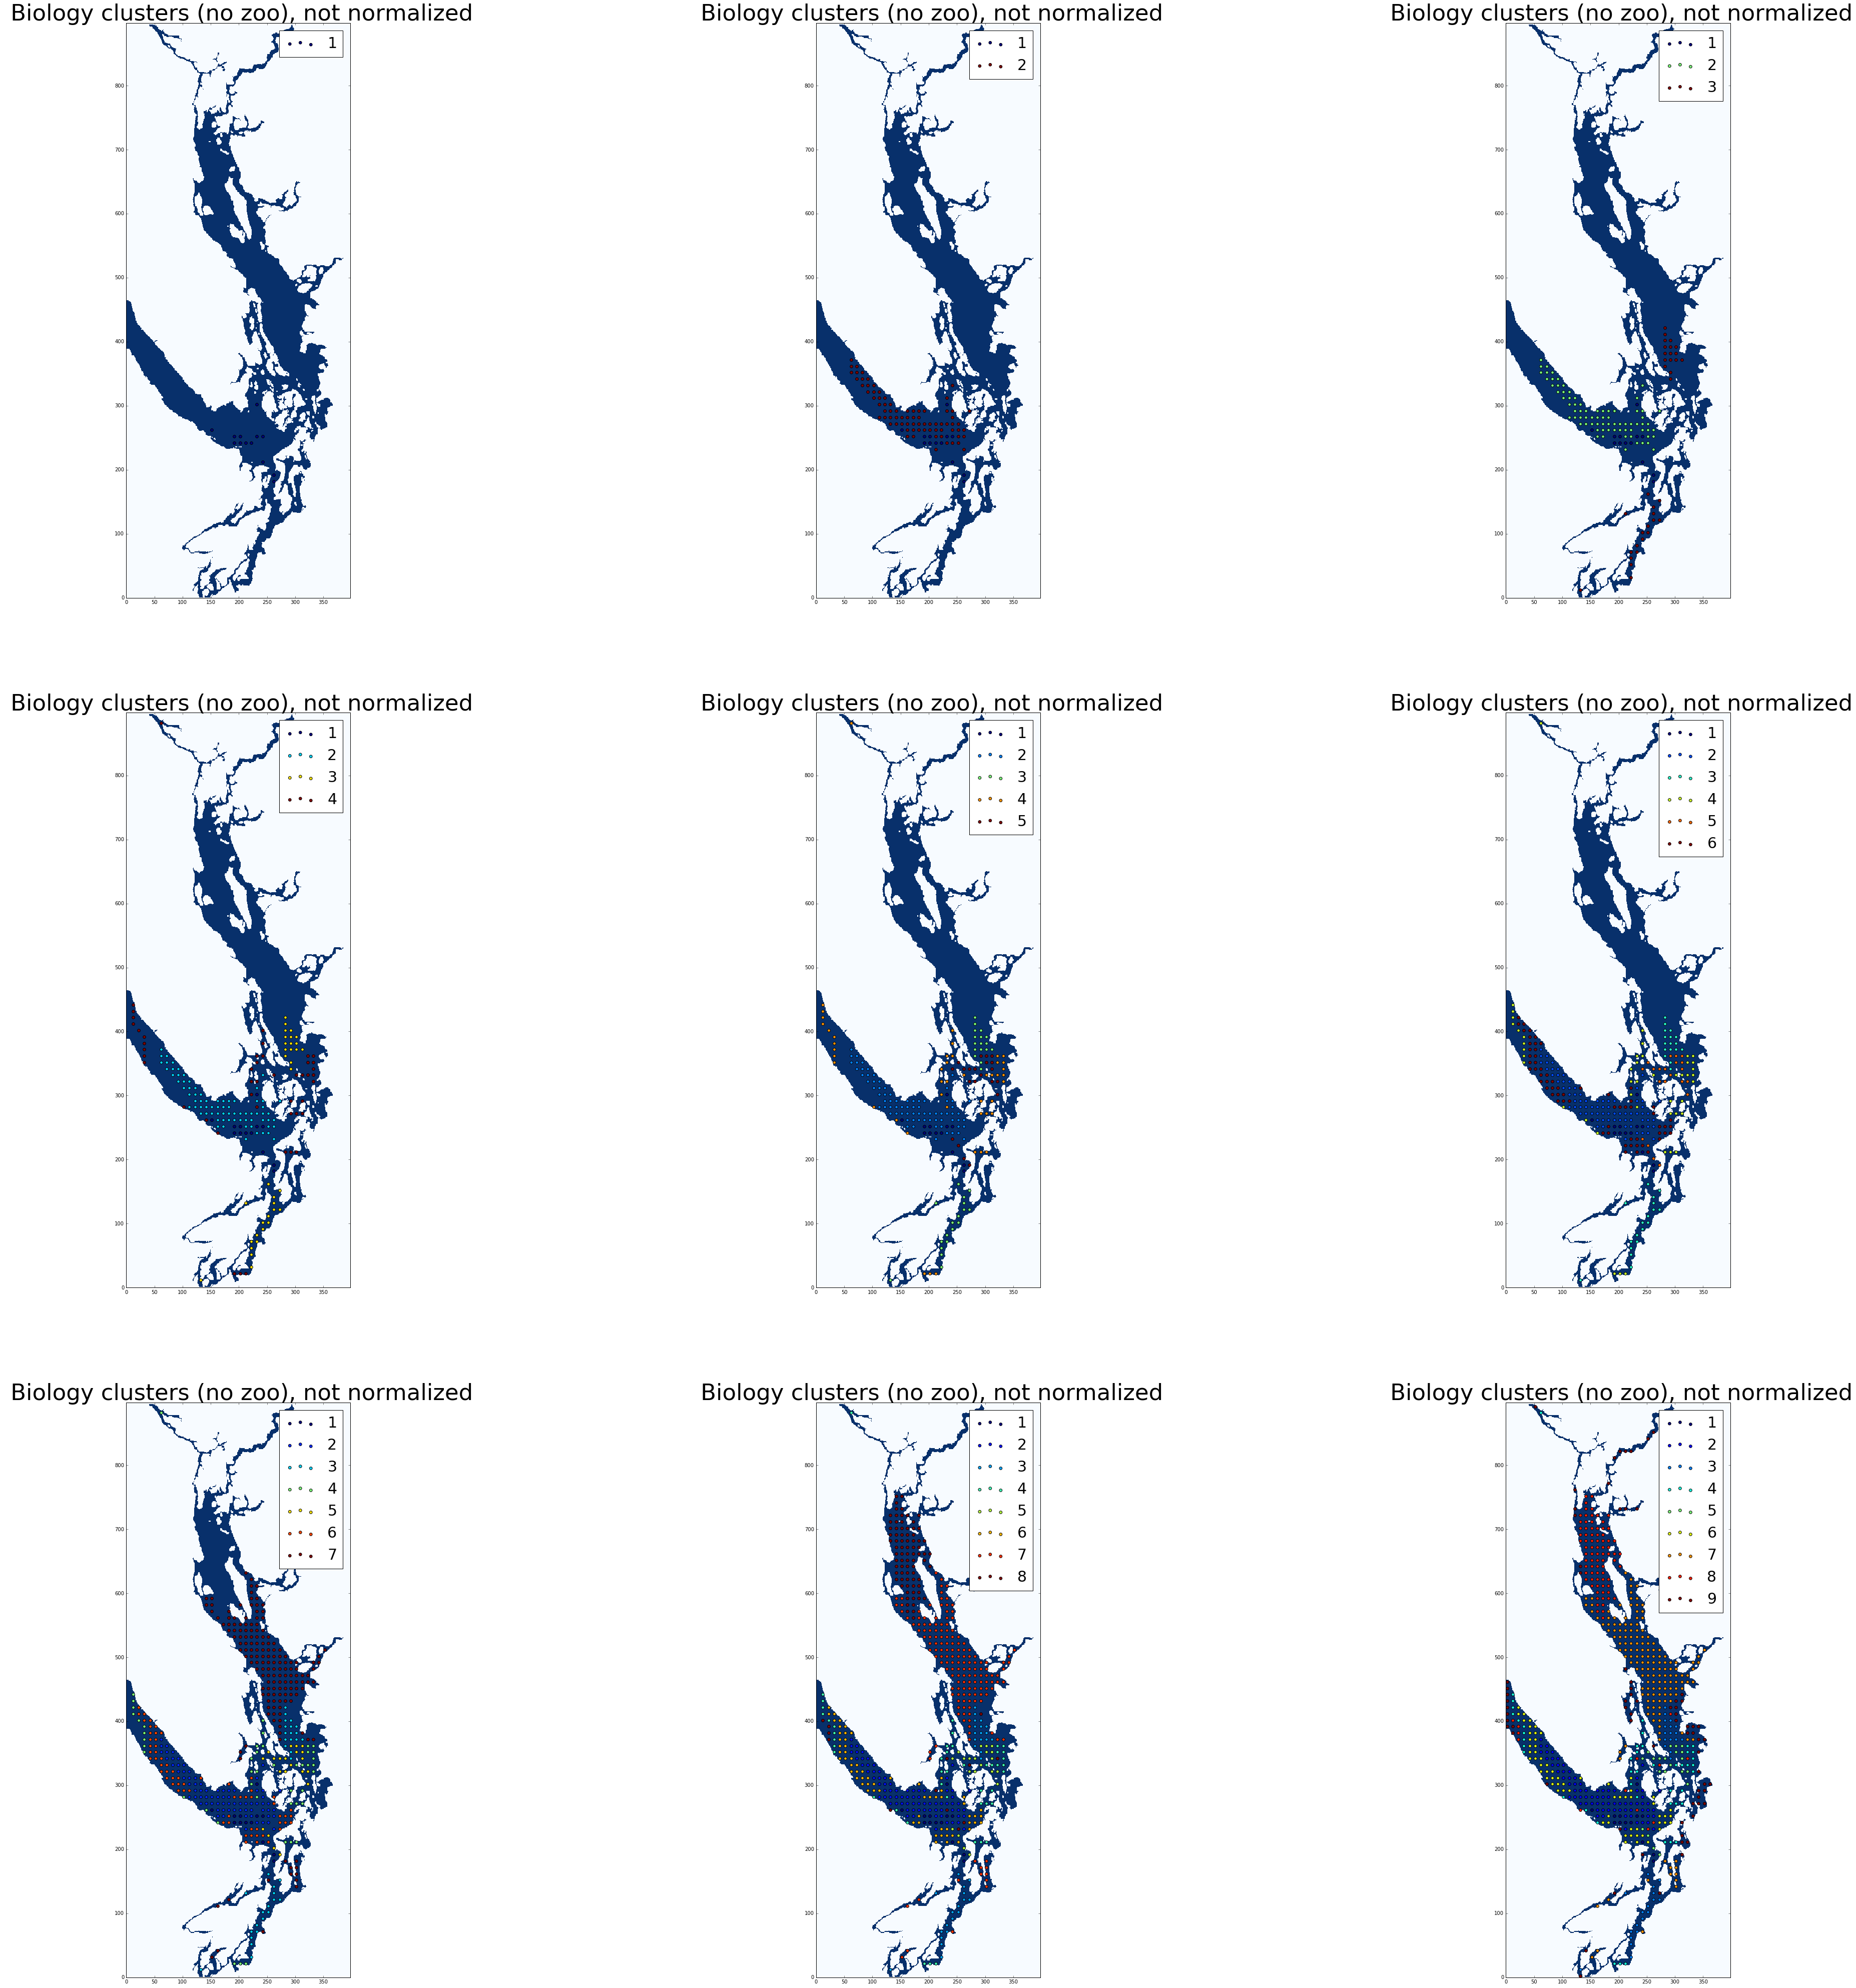

In [255]:
grid_2 = nc.Dataset('/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
fmask  = grid_2.variables['fmask'][:]
fmask = fmask[0,0,:,:]


no_stns = len(d_stn_x)

no_stn = len(d_stn_x)

cmap = plt.get_cmap('Blues')
cmap.set_bad('burlywood')

fig, ax = plt.subplots(3, 3, figsize=(70,70))
no_clusters = 0

for i in range(3):
    for p in range(3):
        no_clusters += 1
        viz_tools.set_aspect(ax[i,p])
        mesh = ax[i,p].pcolormesh(fmask, vmin=0, vmax=1,cmap = cmap)
        ax[i,p].set_ylim([0,898])
        ax[i,p].set_xlim([0,398])
        colors = plt.cm.jet(np.linspace(0, 1, no_clusters))
        for j in range(1,no_clusters+1):
            cluster = np.where(bio_non_norm == j)

            cluster = np.squeeze(cluster)

            #find the xs and ys of the stations in a given cluster
            c1_x = np.take(d_stn_x,cluster)
            c1_y = np.take(d_stn_y,cluster)


            pts = ax[i,p].scatter(c1_x,c1_y,s=32,c=colors[j-1], label=j ,marker='o')
            ax[i,p].set_title(' Biology clusters (no zoo), not normalized',fontsize= 45)
            ax[i,p].legend(loc=1, fontsize = 30)

plt.show()



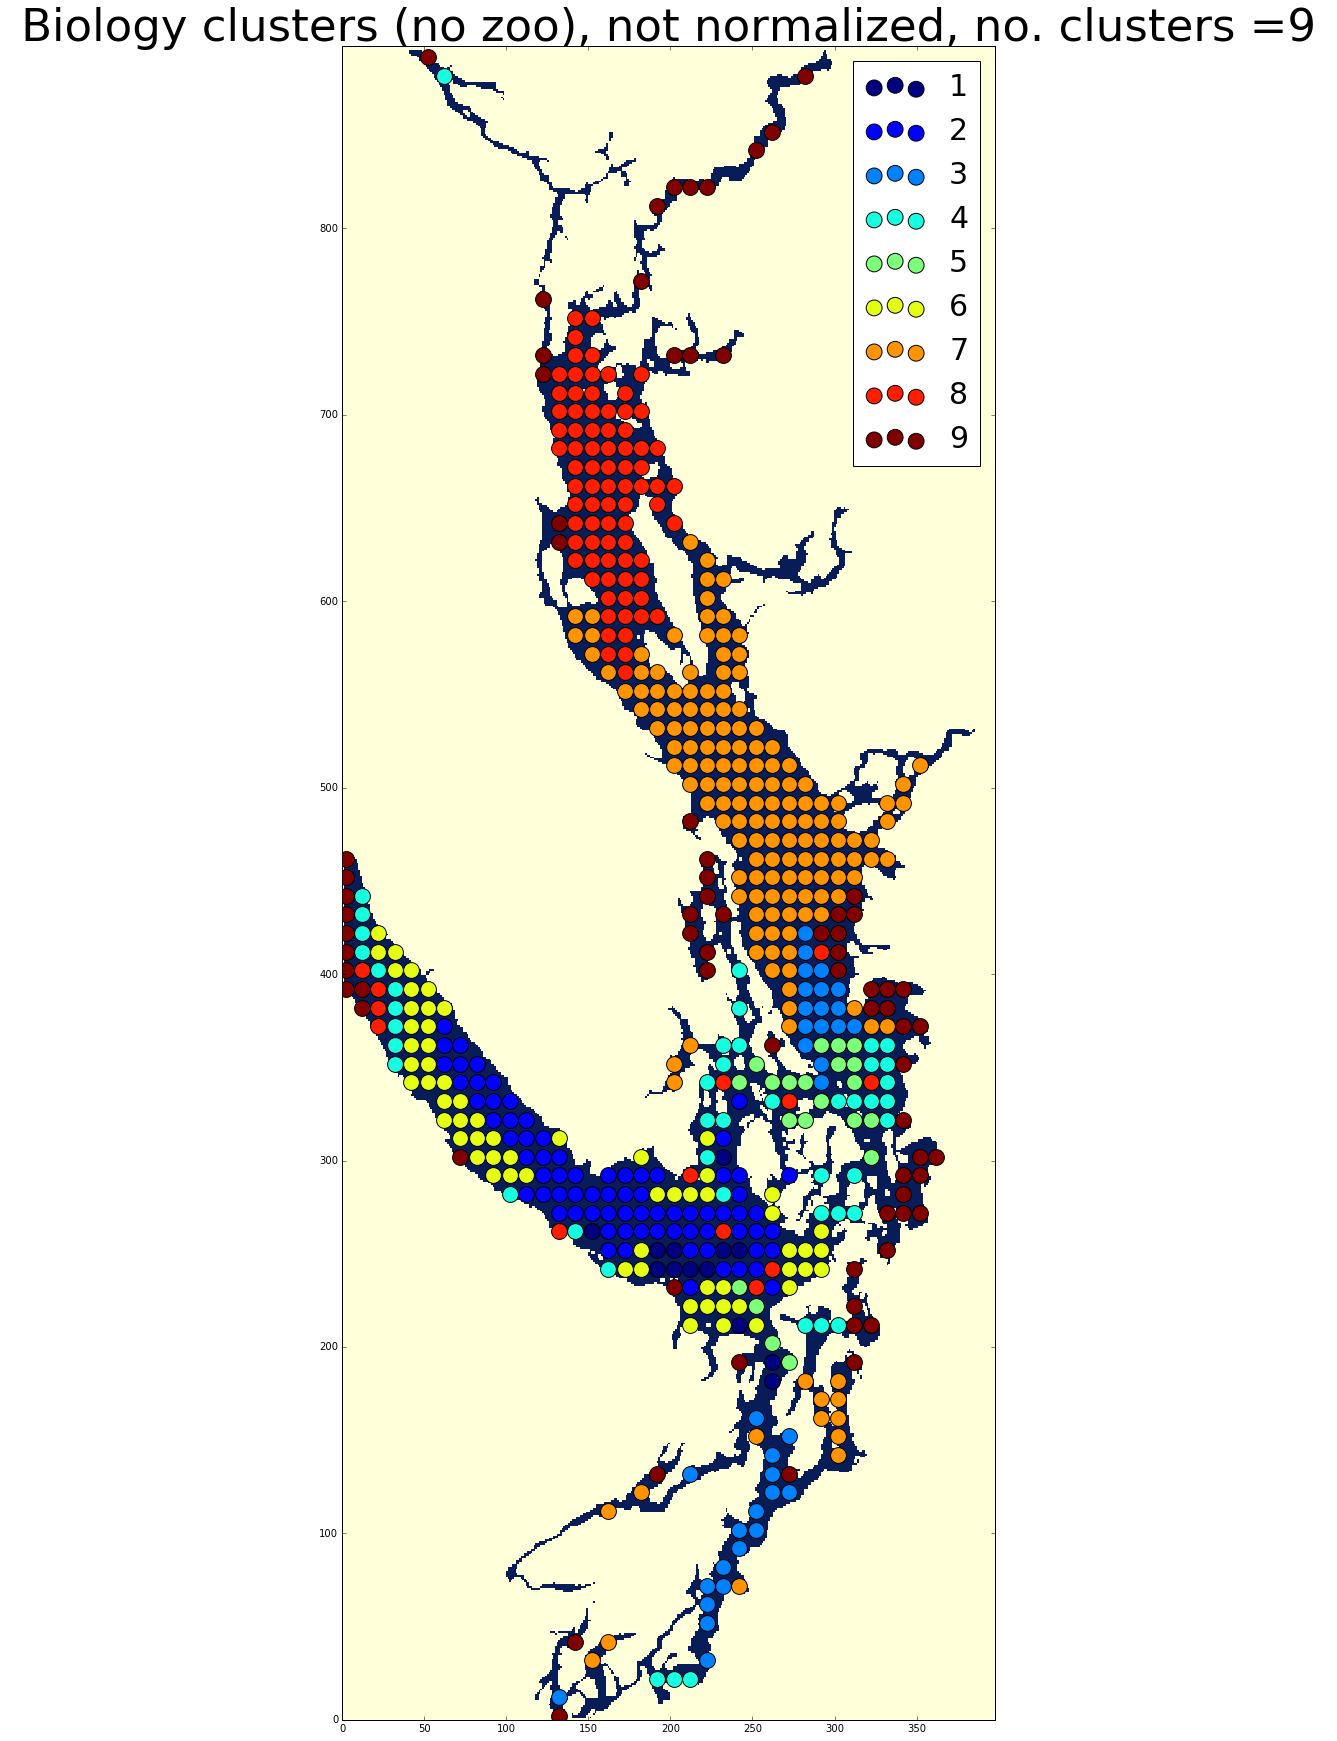

In [258]:
grid_2 = nc.Dataset('/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
fmask  = grid_2.variables['fmask'][:]
fmask = fmask[0,0,:,:]

no_stns = len(d_stn_x)

no_stn = len(d_stn_x)
fig = plt.figure(figsize=(30,30))
plt.rcParams['image.cmap'] = 'YlGnBu'

for i in range(1,2):
    ax = fig.add_subplot(1,1,i)
    viz_tools.set_aspect(ax)      
    mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)
    out=ax.set(title='Domain Extent')
   
    ax.set_ylim([0,898])
    ax.set_xlim([0,398])
    if i ==1:
        no_clusters = 9
        colors = plt.cm.jet(np.linspace(0, 1, no_clusters))
        for j in range(1,no_clusters+1):
            cluster = np.where(bio_non_norm == j)

            cluster = np.squeeze(cluster)

            #find the xs and ys of the stations in a given cluster
            c1_x = np.take(d_stn_x,cluster)
            c1_y = np.take(d_stn_y,cluster)


            pts = ax.scatter(c1_x,c1_y,s=250,c=colors[j-1], label=j ,marker='o')
        ax.set_title(' Biology clusters (no zoo), not normalized, no. clusters =9 ',fontsize= 45)
        plt.legend(loc=1, fontsize = 30)

plt.show()

In [262]:
import pandas as pd

data = pd.read_csv('/ocean/ssahu/MEOPAR/salishseasprint/debby_stations.txt', header = None)
print(data)

                                                   0      1  \
0                          # fall and winter only 23     44   
1                                            # 2003     NaN   
2              2003.29 3 4  59 9 2 48.63 -123.24   2    NaN   
3              2003.29 18 5  102 9 3 48.50 -124.74 5    NaN   
4              2003.29 32 5  75 9 3 48.47 -124.55  5    NaN   
5              2003.29 46 5  72 9 3 48.31 -124.07  5    NaN   
6              2003.29 59 5  69 9 2 48.26 -123.72  3    NaN   
7              2003.29 71 5  200 9 4 48.23 -123.30 3    NaN   
8                                                  #    NaN   
9              2003.41 1 4  56 12 2 48.77 -123.03  5    NaN   
10             2003.41 13 5  62 12 2 48.38 -123.04 4    NaN   
11             2003.41 23 5  75 12 3 48.47 -124.54 5    NaN   
12  2003.41 36 5  72 12 3 48.31 -124.06  5#-124.56 5    NaN   
13             2003.41 47 5  69 12 3 48.26 -123.72 5    NaN   
14             2003.41 73 4  59 12 4 48.63 -123.24 1   

Debby_Indices for 2003

In [344]:
debby_points_2003 = {'lats':[48.63, 48.50, 48.47, 48.31, 48.26, 48.23, \
                            48.77, 48.38, 48.47, 48.31, 48.26, 48.63, 48.86, 49.03, 49.16], \
                     'lons':[-123.24, -124.74, -124.55, -124.07, -123.72, -123.50, \
                            -123.03, -123.04, -124.54, -124.06, -123.72, -123.24, -123.18, -123.44, -123.55 ]}
data_points =[]
for i, j in enumerate(debby_points_2003['lons']):
    index_geo_x, index_geo_y = fcp(debby_points_2003['lons'][i],debby_points_2003['lats'][i],\
                               nav_lon,nav_lat,)
    print(index_geo_x, index_geo_y)
    data_points.append((index_geo_x, index_geo_y))
    
print(data_points)

331 243
413 6
394 31
329 81
294 127
273 155
343 291
269 241
393 32
328 83
294 127
331 243
371 280
423 263
456 263
[(331, 243), (413, 6), (394, 31), (329, 81), (294, 127), (273, 155), (343, 291), (269, 241), (393, 32), (328, 83), (294, 127), (331, 243), (371, 280), (423, 263), (456, 263)]


In [345]:
points_2003 = [(331,243),(413,6),(394,31),(329,81),(294,127),(273,155), (269,241), (393,32), (328,83), \
          (294,127), (331,243), (371,280) ,(423,263), (456,263)]
points_2003 = tuple(reversed(points_2003))
points_2003 = list(points_2003)
print(len(points))

14


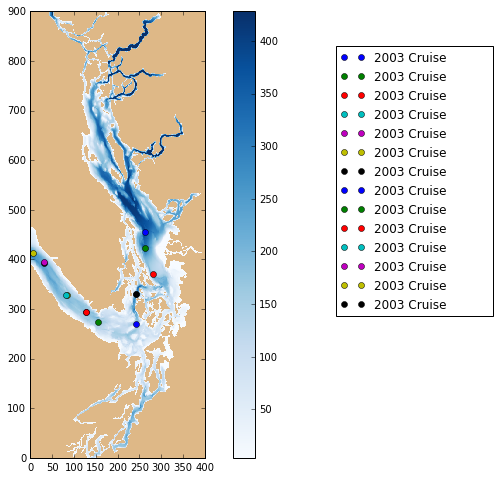

In [346]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('Blues')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
for i in range(len(points_2003)) :
    ax.plot(points_2003[i][1], points[i][0], 'o', label = '2003 Cruise')
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 0.82, 0.9, .102), ncol=1, mode="expand", borderaxespad=0.)

In [356]:
debby_points_2010 = {'lats':[49.83, 49.03, 49.84, 49.03, 49.82, 49.03, 49.15, 48.30], \
                     'lons':[-124.87, -123.43, -124.87, -123.42, -124.86, -123.43, -123.43, -124.00]}
data_points_2010 =[]
for i, j in enumerate(debby_points_2010['lons']):
    index_geo_x, index_geo_y = fcp(debby_points_2010['lons'][i],debby_points_2010['lats'][i],\
                               nav_lon,nav_lat,)
    data_points_2010.append((index_geo_x, index_geo_y))
    print(index_geo_x, index_geo_y)

print(data_points_2010)

680 153
422 264
682 154
421 266
677 153
422 264
445 280
322 90
[(680, 153), (422, 264), (682, 154), (421, 266), (677, 153), (422, 264), (445, 280), (322, 90)]


8


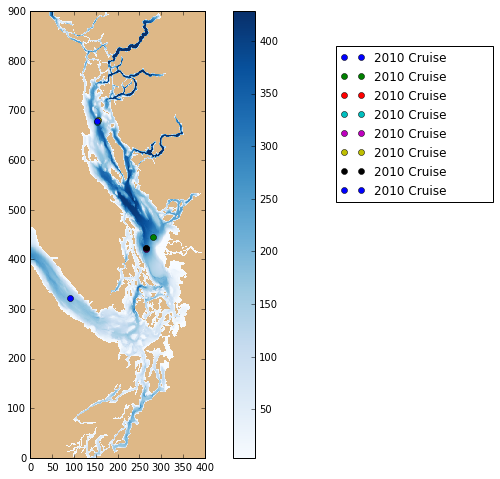

In [374]:
points_2010 = data_points_2010
points_2010 = tuple(reversed(points_2010))
points_2010 = list(points_2010)
print(len(points_2010))


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('Blues')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
for i in range(len(points_2010)) :
    ax.plot(points_2010[i][1], points_2010[i][0], 'o', label = '2010 Cruise')
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 0.82, 0.9, .102), ncol=1, mode="expand", borderaxespad=0.)

In [361]:
debby_points_2011 = {'lats':[48.63, 48.31, 49.03, 49.73, 48.63, 48.31, 49.03, 49.16, 49.73, \
                            49.83, 49.03, 49.02, 49.84, 49.02, 49.84], \
                     'lons':[-123.24, -124.06, -123.44, -124.68, -123.24, -123.07, -123.44, -123.55, -124.70,\
                            -124.87, -123.43, -123.43, -124.87, -123.43, -124.87]}
data_points_2011 =[]
for i, j in enumerate(debby_points_2011['lons']):
    index_geo_x, index_geo_y = fcp(debby_points_2011['lons'][i],debby_points_2011['lats'][i],\
                               nav_lon,nav_lat,)
    data_points_2011.append((index_geo_x, index_geo_y))
    print(index_geo_x, index_geo_y)

print(data_points_2011)

331 243
328 83
423 263
647 168
331 243
257 228
423 263
456 263
648 165
680 153
422 264
420 263
682 154
420 263
682 154
[(331, 243), (328, 83), (423, 263), (647, 168), (331, 243), (257, 228), (423, 263), (456, 263), (648, 165), (680, 153), (422, 264), (420, 263), (682, 154), (420, 263), (682, 154)]


In [364]:
points_2011 = data_points_2011
points_2011 = tuple(reversed(points_2011))
points_2011 = list(points_2011)
print(len(points_2011))

15


In [370]:
points_2011[4][0]

422

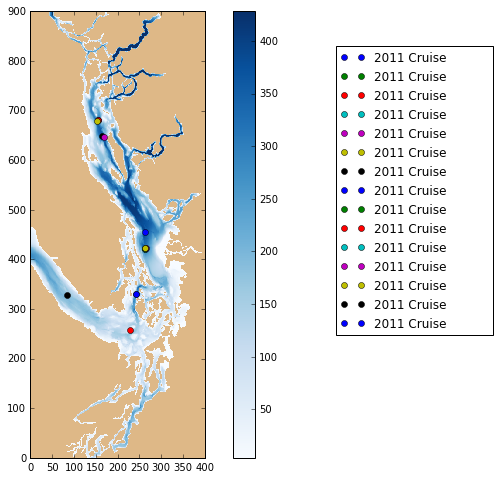

In [373]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('Blues')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
for i in range(len(points_2011)) :
    ax.plot(points_2011[i][1], points_2011[i][0], 'o', label = '2011 Cruise')
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 0.82, 0.9, .102), ncol=1, mode="expand", borderaxespad=0.)

In [375]:
debby_points_2012 = {'lats':[48.63, 48.50, 48.31, 48.26, 49.03, 49.32, 49.73, 49.88, \
                            48.63, 49.88, 49.73, 49.32, 49.03, 48.50, 48.31, 48.26, \
                            48.63, 48.31, 49.03, 49.73, 49.03, 49.84, 49.84, 49.02], \
                     'lons':[-123.24, -123.74, -124.07, -123.16, -123.44, -123.80, -124.68, -124.99, -123.24,\
                            -124.99, -124.68, -123.80, -123.44, -124.73, -124.07, -123.16, -123.24, -124.07, \
                             -123.44, -124.68, -123.43, -124.87, -124.87, -123.43]}

data_points_2012 =[]
for i, j in enumerate(debby_points_2012['lons']):
    index_geo_x, index_geo_y = fcp(debby_points_2012['lons'][i],debby_points_2012['lats'][i],\
                               nav_lon,nav_lat,)
    data_points_2012.append((index_geo_x, index_geo_y))
    print(index_geo_x, index_geo_y)

print(data_points_2012)

331 243
342 153
329 81
254 209
423 263
505 246
647 168
698 141
331 243
698 141
647 168
505 246
423 263
413 8
329 81
254 209
331 243
329 81
423 263
647 168
422 264
682 154
682 154
420 263
[(331, 243), (342, 153), (329, 81), (254, 209), (423, 263), (505, 246), (647, 168), (698, 141), (331, 243), (698, 141), (647, 168), (505, 246), (423, 263), (413, 8), (329, 81), (254, 209), (331, 243), (329, 81), (423, 263), (647, 168), (422, 264), (682, 154), (682, 154), (420, 263)]


24


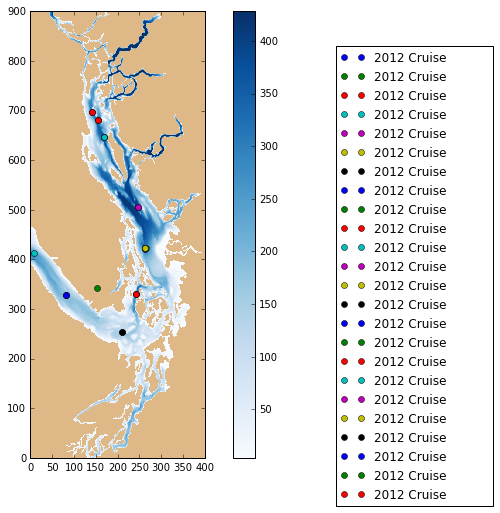

In [377]:
points_2012 = data_points_2012
points_2012 = tuple(reversed(points_2012))
points_2012 = list(points_2012)
print(len(points_2012))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('Blues')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
for i in range(len(points_2012)) :
    ax.plot(points_2012[i][1], points_2012[i][0], 'o', label = '2012 Cruise')
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 0.82, 0.9, .102), ncol=1, mode="expand", borderaxespad=0.)

In [384]:
mean_cluster_points = [(254,209), (413,6), (647,158), (456,263), (328,83), (254,209), (423,263), (393,32), (331,243)]

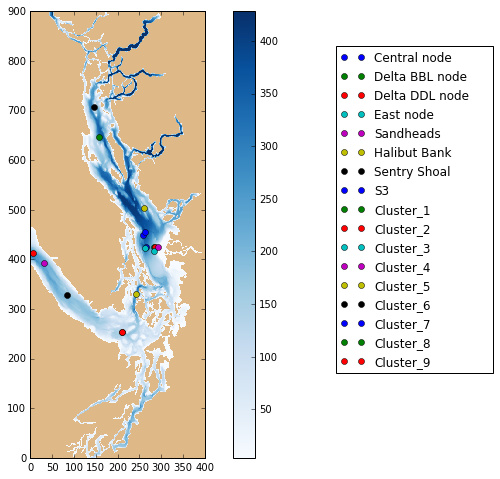

In [391]:
reload(places)
my_list = ['Central node', 'Delta BBL node', 'Delta DDL node', 'East node','Sandheads', \
               'Halibut Bank', 'Sentry Shoal', 'S3', 'Cluster_1', 'Cluster_2',\
          'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_8', 'Cluster_9']
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('Blues')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
for nodes in my_list :
    points = places.PLACES[nodes]['NEMO grid ji']
    points = tuple(reversed(points))
    points = list(points)
    ax.plot(points[0], points[1], 'o', label = nodes)
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 0.82, 0.9, .102), ncol=1, mode="expand", borderaxespad=0.)




In [392]:
pwd

'/ocean/ssahu/MEOPAR/salishseanowcast/notebooks/figures/research'